In [5]:
import pandas as pd

In [9]:
def read_jsonl(file_path):
    # 1) Read the .jsonl file
    df = pd.read_json(file_path, lines=True)

    # 2) Expand the nested "metric" column into separate columns
    metrics = pd.json_normalize(df["metric"])
    df = pd.concat([df.drop(columns=["metric"]), metrics], axis=1)
    return df

In [2]:


# 1) Read the .jsonl file
df = pd.read_json("/home/david.weijiecai/computational_imaging/ExposureDiffusion/eval_results_v2.jsonl", lines=True)

# 2) Expand the nested "metric" column into separate columns
metrics = pd.json_normalize(df["metric"])
df = pd.concat([df.drop(columns=["metric"]), metrics], axis=1)

print(df)

               file_name       PSNR      SSIM
0    10003_00_0.04s.tiff  31.223898  0.757354
1     10003_00_0.1s.tiff  33.426306  0.843876
2    10003_01_0.04s.tiff  33.807337  0.797611
3     10003_01_0.1s.tiff  31.735858  0.810362
4    10003_02_0.04s.tiff  32.677367  0.778276
..                   ...        ...       ...
590  10228_05_0.04s.tiff  32.409966  0.782298
591  10228_06_0.04s.tiff  32.611036  0.794605
592  10228_07_0.04s.tiff  32.548363  0.798137
593  10228_08_0.04s.tiff  32.434434  0.784982
594  10228_09_0.04s.tiff  32.524409  0.791092

[595 rows x 3 columns]


In [4]:
df.PSNR.mean()

31.86245168901611

In [5]:
df.SSIM.mean()

0.8330799206422276

<AxesSubplot:ylabel='Frequency'>

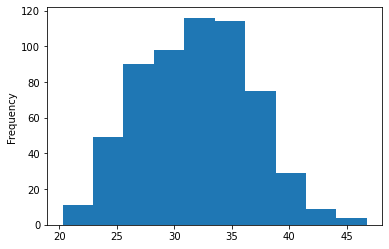

In [6]:
df.PSNR.plot.hist()

In [11]:
clean_path = "/home/david.weijiecai/computational_imaging/ExposureDiffusion/eval_results.jsonl"
blur_path = "/home/david.weijiecai/computational_imaging/ExposureDiffusion/eval_results_v2.jsonl"
df1 = read_jsonl(clean_path)
df2 = read_jsonl(blur_path)

In [22]:
df1["file_id"] = df1.file_name.str.replace("s.ARW", "")
df2["file_id"] = df2.file_name.str.replace("s.tiff", "")

In [34]:
df1.nsmallest(n=30, columns=["PSNR"])

,file_name,PSNR,SSIM,file_id
125,10045_01_0.04s.ARW,23.662493,0.770655,10045_01_0.04
123,10045_00_0.04s.ARW,23.708719,0.770760,10045_00_0.04
131,10045_06_0.1s.ARW,23.935693,0.797032,10045_06_0.1
133,10045_08_0.1s.ARW,23.971695,0.796055,10045_08_0.1
135,10045_10_0.1s.ARW,23.996498,0.797771,10045_10_0.1
126,10045_01_0.1s.ARW,24.003590,0.797351,10045_01_0.1
134,10045_09_0.1s.ARW,24.005291,0.796519,10045_09_0.1
124,10045_00_0.1s.ARW,24.008852,0.797080,10045_00_0.1
136,10045_11_0.1s.ARW,24.009155,0.797121,10045_11_0.1
132,10045_07_0.1s.ARW,24.013909,0.797628,10045_07_0.1


In [23]:
df2

,file_name,PSNR,SSIM,file_id
0,10003_00_0.04s.tiff,31.223898,0.757354,10003_00_0.04
1,10003_00_0.1s.tiff,33.426306,0.843876,10003_00_0.1
2,10003_01_0.04s.tiff,33.807337,0.797611,10003_01_0.04
3,10003_01_0.1s.tiff,31.735858,0.810362,10003_01_0.1
4,10003_02_0.04s.tiff,32.677367,0.778276,10003_02_0.04
...,...,...,...,...
590,10228_05_0.04s.tiff,32.409966,0.782298,10228_05_0.04
591,10228_06_0.04s.tiff,32.611036,0.794605,10228_06_0.04
592,10228_07_0.04s.tiff,32.548363,0.798137,10228_07_0.04
593,10228_08_0.04s.tiff,32.434434,0.784982,10228_08_0.04


In [26]:
df = pd.merge(df1, df2, on= "file_id", suffixes=["clean", "blur"])

In [28]:
df["diff"] = df.PSNRclean - df.PSNRblur

In [30]:
df.nlargest(n=10, columns=["diff"])

,file_nameclean,PSNRclean,SSIMclean,file_id,file_nameblur,PSNRblur,SSIMblur,diff
174,10069_00_0.1s.ARW,44.764772,0.979708,10069_00_0.1,10069_00_0.1s.tiff,30.971061,0.925367,13.793711
83,10032_07_0.1s.ARW,44.748467,0.977783,10032_07_0.1,10032_07_0.1s.tiff,31.065616,0.909917,13.682851
79,10032_03_0.1s.ARW,44.413659,0.977635,10032_03_0.1,10032_03_0.1s.tiff,30.950460,0.909522,13.463199
275,10111_03_0.1s.ARW,34.940091,0.828239,10111_03_0.1,10111_03_0.1s.tiff,21.521310,0.829536,13.418781
293,10125_01_0.1s.ARW,33.672273,0.747473,10125_01_0.1,10125_01_0.1s.tiff,20.296454,0.536819,13.375819
84,10032_08_0.1s.ARW,43.956211,0.977346,10032_08_0.1,10032_08_0.1s.tiff,30.587266,0.906774,13.368945
274,10111_02_0.1s.ARW,34.875004,0.821644,10111_02_0.1,10111_02_0.1s.tiff,21.531336,0.826366,13.343668
298,10125_06_0.1s.ARW,33.707635,0.748173,10125_06_0.1,10125_06_0.1s.tiff,20.373265,0.535677,13.334370
219,10087_04_0.1s.ARW,35.762024,0.863380,10087_04_0.1,10087_04_0.1s.tiff,22.490460,0.786400,13.271563
294,10125_02_0.1s.ARW,33.729631,0.749170,10125_02_0.1,10125_02_0.1s.tiff,20.590815,0.539472,13.138816


In [31]:
df.nsmallest(n=10, columns=["diff"])

,file_nameclean,PSNRclean,SSIMclean,file_id,file_nameblur,PSNRblur,SSIMblur,diff
129,10045_04_0.1s.ARW,24.051199,0.797201,10045_04_0.1,10045_04_0.1s.tiff,26.657162,0.840838,-2.605963
126,10045_01_0.1s.ARW,24.003590,0.797351,10045_01_0.1,10045_01_0.1s.tiff,26.427781,0.840336,-2.424191
135,10045_10_0.1s.ARW,23.996498,0.797771,10045_10_0.1,10045_10_0.1s.tiff,26.040919,0.836322,-2.044421
127,10045_02_0.1s.ARW,24.047503,0.797011,10045_02_0.1,10045_02_0.1s.tiff,26.079185,0.831206,-2.031682
134,10045_09_0.1s.ARW,24.005291,0.796519,10045_09_0.1,10045_09_0.1s.tiff,25.686905,0.838231,-1.681614
128,10045_03_0.1s.ARW,24.067709,0.797761,10045_03_0.1,10045_03_0.1s.tiff,25.732618,0.832313,-1.664908
136,10045_11_0.1s.ARW,24.009155,0.797121,10045_11_0.1,10045_11_0.1s.tiff,25.618973,0.831015,-1.609818
357,10167_05_0.1s.ARW,38.423518,0.842115,10167_05_0.1,10167_05_0.1s.tiff,39.819401,0.879031,-1.395884
130,10045_05_0.1s.ARW,24.027122,0.797380,10045_05_0.1,10045_05_0.1s.tiff,25.398288,0.820864,-1.371166
88,10034_01_0.04s.ARW,28.786821,0.851806,10034_01_0.04,10034_01_0.04s.tiff,30.156055,0.870773,-1.369233
